In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


In [94]:
#数据清洗
data = pd.read_csv('./data_wuliu.csv',encoding='gbk')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1161 entries, 0 to 1160
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1159 non-null   object 
 1   订单行     1161 non-null   int64  
 2   销售时间    1161 non-null   object 
 3   交货时间    1161 non-null   object 
 4   货品交货状况  1159 non-null   object 
 5   货品      1161 non-null   object 
 6   货品用户反馈  1161 non-null   object 
 7   销售区域    1161 non-null   object 
 8   数量      1157 non-null   float64
 9   销售金额    1161 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 90.8+ KB


In [95]:
# #去重
data.drop_duplicates(keep='first',inplace=True)

#删除有缺失值的行
data.dropna(axis=0,how='any',inplace=True)

#删除订单行列
data.drop(columns='订单行',inplace=True,axis=1)
data.info()
#重建索引index
data.reset_index(drop=True,inplace=True)
data

<class 'pandas.core.frame.DataFrame'>
Index: 1146 entries, 0 to 1160
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   订单号     1146 non-null   object 
 1   销售时间    1146 non-null   object 
 2   交货时间    1146 non-null   object 
 3   货品交货状况  1146 non-null   object 
 4   货品      1146 non-null   object 
 5   货品用户反馈  1146 non-null   object 
 6   销售区域    1146 non-null   object 
 7   数量      1146 non-null   float64
 8   销售金额    1146 non-null   object 
dtypes: float64(1), object(8)
memory usage: 89.5+ KB


,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,"1052,75元"
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,"11,50万元"
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,"6858,77元"
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,"129,58元"
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,"32,39元"
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,"200,41元"
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,"79,44元"
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,"194,08元"
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,"32,18元"


In [96]:
#自定义函数实现销售金额标准格式，万元转换为元，去掉,号，去掉元
def salse_amount(number):
    if(number.find('万元')) != -1:
        new_number = float(number[:number.find('万元')].replace(',',''))*10000
        pass
    else:
        new_number = float(number.replace('元','').replace(',',''))
        pass
    return new_number
data['销售金额'] = data['销售金额'].map(salse_amount)
data
# data.info()      

,订单号,销售时间,交货时间,货品交货状况,货品,货品用户反馈,销售区域,数量,销售金额
0,P096311,2016-7-30,2016-9-30,晚交货,货品3,质量合格,华北,2.0,105275.0
1,P096826,2016-8-30,2016-10-30,按时交货,货品3,质量合格,华北,10.0,11500000.0
2,P097435,2016-7-30,2016-9-30,按时交货,货品1,返修,华南,2.0,685877.0
3,P097446,2016-11-26,2017-1-26,晚交货,货品3,质量合格,华北,15.0,12958.0
4,P097446,2016-11-26,2017-1-26,晚交货,货品3,拒货,华北,15.0,3239.0
...,...,...,...,...,...,...,...,...,...
1141,P299901,2016-12-15,2017-3-15,按时交货,货品6,质量合格,马来西亚,2.0,20041.0
1142,P302956,2016-12-22,2017-3-22,按时交货,货品2,拒货,华东,20.0,7944.0
1143,P303801,2016-12-15,2017-3-15,按时交货,货品2,质量合格,华东,1.0,19408.0
1144,P307276,2016-12-22,2017-3-22,按时交货,货品6,质量合格,马来西亚,1.0,3218.0


### 异常值处理

In [100]:

#可以看出销售金额出现0的现象，这种数据可直接删除
#从均值和中位数可以看出数据出现严重的右偏现象，及2/8现象，此现象在此处正常
data = data[data['销售金额']!=0]
data.describe()

,数量,销售金额
count,1145.000000,1.145000e+03
mean,76.134934,1.224557e+05
std,589.669861,1.115081e+06
min,1.000000,5.100000e+01
25%,1.000000,2.946000e+03
50%,1.000000,9.486000e+03
75%,4.000000,3.577300e+04
max,11500.000000,3.270000e+07


### 数据规整

增加一列辅助列用于数据分析可视化
增加一列月份列，从销售时间转化成这一列

In [116]:
# data['销售时间'] = pd.to_datetime(data.loc[:,'销售时间'])
# data['月份'] = data['销售时间'].apply(lambda x:x.month)
# # data['月份'] = data['销售时间'].apply(lambda x:x.month)
# data
#优化
data.loc[:,'销售时间'] = pd.to_datetime(data['销售时间'],errors='coerce')
data.loc[:,'月份'] = data['销售时间'].dt.month
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 0 to 1145
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   订单号     1145 non-null   object        
 1   销售时间    1145 non-null   datetime64[ns]
 2   交货时间    1145 non-null   object        
 3   货品交货状况  1145 non-null   object        
 4   货品      1145 non-null   object        
 5   货品用户反馈  1145 non-null   object        
 6   销售区域    1145 non-null   object        
 7   数量      1145 non-null   float64       
 8   销售金额    1145 non-null   float64       
 9   月份      1145 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(6)
memory usage: 98.4+ KB


### 分析配送服务是否有问题

a,月份维度分析

In [125]:
data['货品交货状况'] = data['货品交货状况'].str.strip()
data1 = data.groupby(by=['月份','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1
#从月度的按时交货率可推断出按时交货率首季节影响

/var/folders/j5/g12w_l610c52752zyy6qk3dr0000gn/T/ipykernel_73275/704765620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品交货状况'] = data['货品交货状况'].str.strip()


货品交货状况,按时交货,晚交货,按时交货率
月份,,,
7,189,13,0.935644
8,218,35,0.861660
9,122,9,0.931298
10,238,31,0.884758
11,101,25,0.801587
12,146,18,0.890244


### b,销售区域维度分析

In [161]:
data['货品交货状况'] = data['货品交货状况'].str.strip()
# data1 = data.groupby(by=['销售区域','货品交货状况']).size().unstack()
data1 = data.groupby(['货品','销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/data1.sum(axis=1)
data1
# data1.sort_values(by='按时交货率',ascending=False)

#从区域的按时交货率来看西北区域的交货服务有很大问题，按时交货率很低，原因待分析

/var/folders/j5/g12w_l610c52752zyy6qk3dr0000gn/T/ipykernel_73275/3312139687.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品交货状况'] = data['货品交货状况'].str.strip()


货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
    西北      3.0   NaN  1.000000
货品2 华东    268.0  39.0  0.872964
    马来西亚    1.0   9.0  0.100000
货品3 华北    212.0  26.0  0.890756
货品4 西北     14.0  44.0  0.241379
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848

### c,从货品维度分析


In [130]:
data['货品交货状况'] = data['货品交货状况'].str.strip()
data1 = data.groupby(by=['货品','销售区域','货品交货状况']).size().unstack()
data1['按时交货率'] = data1['按时交货']/(data1['按时交货']+data1['晚交货'])
data1.sort_values(by='按时交货率',ascending=False)
#可以看出西北区域的货品1，4有问题，马来西亚的货品2交货有很大问题

/var/folders/j5/g12w_l610c52752zyy6qk3dr0000gn/T/ipykernel_73275/828160758.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品交货状况'] = data['货品交货状况'].str.strip()


货品交货状况     按时交货   晚交货     按时交货率
货品  销售区域                       
货品5 泰国    183.0   4.0  0.978610
货品6 马来西亚  309.0   7.0  0.977848
货品1 华北     14.0   1.0  0.933333
    华南     10.0   1.0  0.909091
货品3 华北    212.0  26.0  0.890756
货品2 华东    268.0  39.0  0.872964
货品4 西北     14.0  44.0  0.241379
货品2 马来西亚    1.0   9.0  0.100000
货品1 西北      3.0   NaN       NaN

### 是否有潜力的销售区域

a,从月份数据进行分析

<Axes: xlabel='月份'>

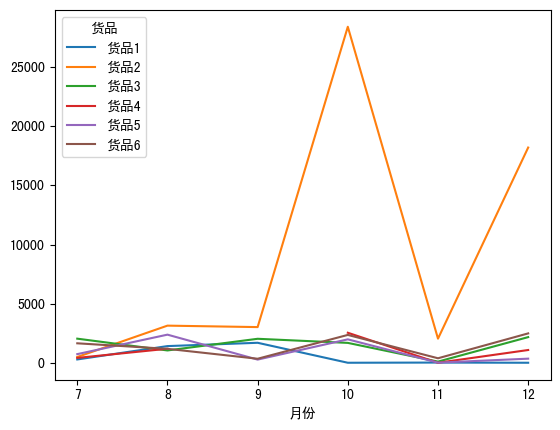

In [137]:
data2 = data.groupby(['月份','货品'])['数量'].sum().unstack()
data2
#绘制折线图
data2.plot(kind='line')
#从折线图上可看出货品2在10月份销售量猛增，原因可能是因为：1，加大了推广力度，2，增加了推广区域

### 从销售区域分析货品销售量

In [138]:
data3 = data.groupby(['销售区域','货品'])['数量'].sum().unstack()
data3
#可以看出，货品2主要销售区域在华东，现在要确定华东是不是新增的货品2的销售区域，或者是货品2在华东加大了推广力度

货品,货品1,货品2,货品3,货品4,货品5,货品6
销售区域,,,,,,
华东,NaN,53811.0,NaN,NaN,NaN,NaN
华北,2827.0,NaN,9073.5,NaN,NaN,NaN
华南,579.0,NaN,NaN,NaN,NaN,NaN
泰国,NaN,NaN,NaN,NaN,5733.0,NaN
西北,11.0,NaN,NaN,5229.0,NaN,NaN
马来西亚,NaN,1510.0,NaN,NaN,NaN,8401.0


In [142]:
data4 = data.groupby(['月份','销售区域','货品'])['数量'].sum().unstack()
data4
# data5 = data4.loc[:,'货品2']
# data5
#可以看出货品2在十月份和12月份销量猛增，并且华东并不是新开发区域，所以排除新增区域，极大可能是因为这两个月在华东加大了宣传力度，或者是因为假期原因

货品          货品1      货品2     货品3     货品4     货品5     货品6
月份 销售区域                                                 
7  华东       NaN    489.0     NaN     NaN     NaN     NaN
   华北       1.0      NaN  2041.5     NaN     NaN     NaN
   华南     282.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   733.0     NaN
   西北       NaN      NaN     NaN   414.0     NaN     NaN
   马来西亚     NaN      2.0     NaN     NaN     NaN  1649.0
8  华东       NaN   1640.0     NaN     NaN     NaN     NaN
   华北    1410.0      NaN  1045.0     NaN     NaN     NaN
   华南       3.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN  2381.0     NaN
   西北       NaN      NaN     NaN  1188.0     NaN     NaN
   马来西亚     NaN   1503.0     NaN     NaN     NaN  1181.0
9  华东       NaN   3019.0     NaN     NaN     NaN     NaN
   华北    1409.0      NaN  2031.0     NaN     NaN     NaN
   华南     283.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   271.0     NaN
   西北       1.0      NaN     NaN     NaN     NaN     NaN
   马来西亚     NaN      1.0     NaN     NaN     NaN   343.0
10 华东       NaN  28420.0     NaN     NaN     NaN     NaN
   华北       3.0      NaN  1684.0     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN  1984.0     NaN
   西北       1.0      NaN     NaN  2542.0     NaN     NaN
   马来西亚     NaN      NaN     NaN     NaN     NaN  2358.0
11 华东       NaN   2041.0     NaN     NaN     NaN     NaN
   华北       2.0      NaN   100.0     NaN     NaN     NaN
   华南       9.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN    14.0     NaN
   西北       9.0      NaN     NaN     3.0     NaN     NaN
   马来西亚     NaN      1.0     NaN     NaN     NaN   383.0
12 华东       NaN  18202.0     NaN     NaN     NaN     NaN
   华北       2.0      NaN  2172.0     NaN     NaN     NaN
   华南       2.0      NaN     NaN     NaN     NaN     NaN
   泰国       NaN      NaN     NaN     NaN   350.0     NaN
   西北       NaN      NaN     NaN  1082.0     NaN     NaN
   马来西亚     NaN      3.0     NaN     NaN     NaN  2487.0

### 分析货品质量问题

a,从货品的用户反馈维度分析

In [150]:
data['货品用户反馈'] = data['货品用户反馈'].str.strip()
data1 = data.groupby(['货品','销售区域'])['货品用户反馈'].value_counts().unstack()
#计算合格率，返修率，退货率
data1['合格率'] = data1['质量合格']/data1.sum(axis=1)
data1['拒货率'] = data1['拒货']/data1.sum(axis=1)
data1['返修率'] = data1['返修']/data1.sum(axis=1)
data1.sort_values(['合格率','返修率','拒货率'],ascending=False)
#可以看出货品3，6，5的合格率比1，2，4货品的高，
#而且货品2在马来西亚，以及货品4在西北合格率最低，且货品4在西北地区的返修率很高，货品2在马拉西亚的拒货率很高

/var/folders/j5/g12w_l610c52752zyy6qk3dr0000gn/T/ipykernel_73275/3859543682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['货品用户反馈'] = data['货品用户反馈'].str.strip()


货品用户反馈      拒货   质量合格    返修       合格率       拒货率       返修率
货品  销售区域                                                 
货品3 华北    31.0  188.0  19.0  0.789916  0.129821  0.079525
货品6 马来西亚  56.0  246.0  14.0  0.778481  0.176780  0.044170
货品5 泰国    14.0  144.0  29.0  0.770053  0.074559  0.154383
货品2 华东    72.0  184.0  51.0  0.599349  0.234071  0.165674
货品1 华南     5.0    4.0   2.0  0.363636  0.440000  0.169439
    西北     NaN    1.0   2.0  0.333333       NaN  0.600000
    华北     NaN    3.0  12.0  0.200000       NaN  0.789474
货品4 西北     NaN    9.0  49.0  0.155172       NaN  0.842573
货品2 马来西亚   6.0    1.0   3.0  0.100000  0.594059  0.280530

### 分析货品1在马来西亚，以及货品4在西北合格率最低，且货品4在西北地区的返修率很高，货品2在马拉西亚的拒货率很高的原因

a,从之前分析的按时交货率可看出，货品4在西北以及货品2在马来西亚的按时交货率很低，可以从运输时长着手

In [156]:
data['销售时间'] = pd.to_datetime(data['销售时间'])
data['交货时间'] = pd.to_datetime(data['交货时间'])
data['leantime'] = (data['交货时间']-data['销售时间']).dt.days
data1 = data.groupby(['货品','销售区域'])['leantime'].mean().unstack()
data1
#可以参考之前各种货品在各个区域的按时交货率，以及在每个区域的平均运输时长可得，货品1西北和货品4在西北运输时长较长，说明：
# 马来西亚队货品配送的及时性要求比较高，所以不能按时配送的货物都基本被退货
#货品4可能是在长时间运输中比较容易受损，所以在西北区域运输时长较长的情况下，返修率比较高
#从马来西亚的区域货品2的销售量来看，退货率高，销售量少，可以考虑放弃马来西亚区域的销售
#在西北地区的货品销售量对比其他销售地区的销售量不算少，可以继续推广，但是要减少货品在运输过程中的破损减少返修率

/var/folders/j5/g12w_l610c52752zyy6qk3dr0000gn/T/ipykernel_73275/507668590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['销售时间'] = pd.to_datetime(data['销售时间'])
/var/folders/j5/g12w_l610c52752zyy6qk3dr0000gn/T/ipykernel_73275/507668590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['交货时间'] = pd.to_datetime(data['交货时间'])
/var/folders/j5/g12w_l610c52752zyy6qk3dr0000gn/T/ipykernel_73275/507668590.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

销售区域,华东,华北,华南,泰国,西北,马来西亚
货品,,,,,,
货品1,NaN,83.333333,69.272727,NaN,60.666667,NaN
货品2,78.872964,NaN,NaN,NaN,NaN,73.000000
货品3,NaN,76.521008,NaN,NaN,NaN,NaN
货品4,NaN,NaN,NaN,NaN,71.000000,NaN
货品5,NaN,NaN,NaN,73.058824,NaN,NaN
货品6,NaN,NaN,NaN,NaN,NaN,74.224684
